#Notebook: Modelado Gaussiano
###Por: Maria Camila Remolina Gutiérrez

En este notebook se hace un fit gaussiano a una fuente

In [3]:
%pylab inline
import os, copy
from astropy.io import fits
from scipy.optimize import leastsq

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
#Paths
path_modelado = './imagenes/modelado_gaussiano/'

In [5]:
visita = fits.open('./imagenes/graficas/media.fits')

data = visita[0].data

visita.close()

shape_data = shape(data)
print shape_data

(1200, 1200)


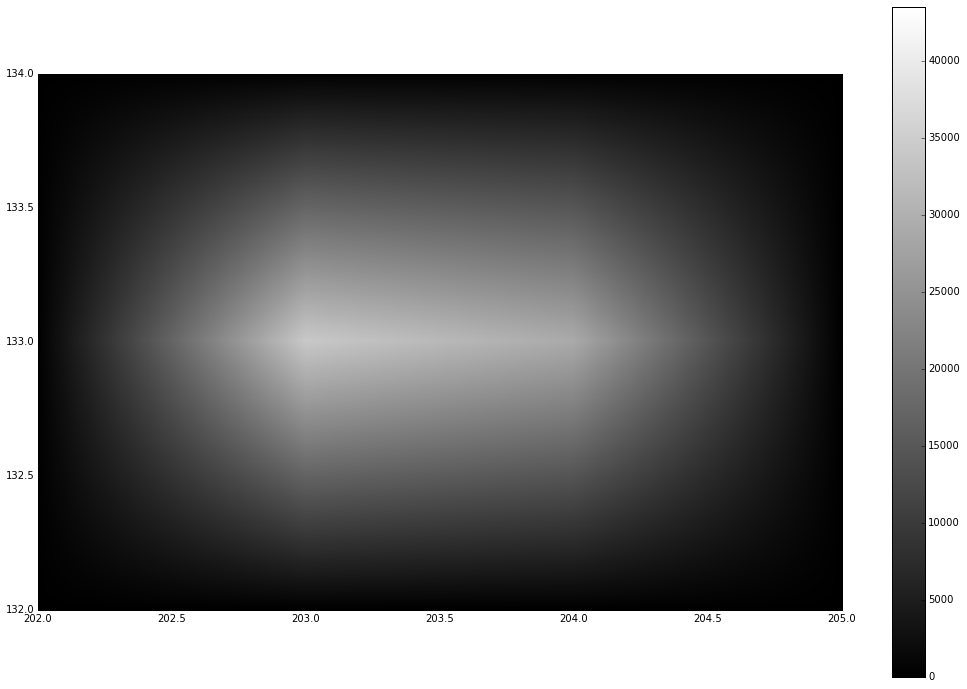

In [53]:
#xlim(955,965)
#ylim(190,194)

xlim_min = 202
xlim_max = 205
ylim_min = 132
ylim_max = 134

fig = figure(figsize=(18,12))
imshow(data, cmap='gray')
colorbar()
xlim(xlim_min,xlim_max)
ylim(ylim_min,ylim_max)
show()
close()

In [54]:
#recorte = data[xlim_min:xlim_max,ylim_min:ylim_max]
recorte = data[ylim_min:ylim_max+1,xlim_min:xlim_max+1]

In [55]:
print shape(recorte)
print recorte

(3, 4)
[[     0.              0.              0.              0.        ]
 [     0.          33990.10058594  29014.15625         0.        ]
 [     0.              0.              0.              0.        ]]


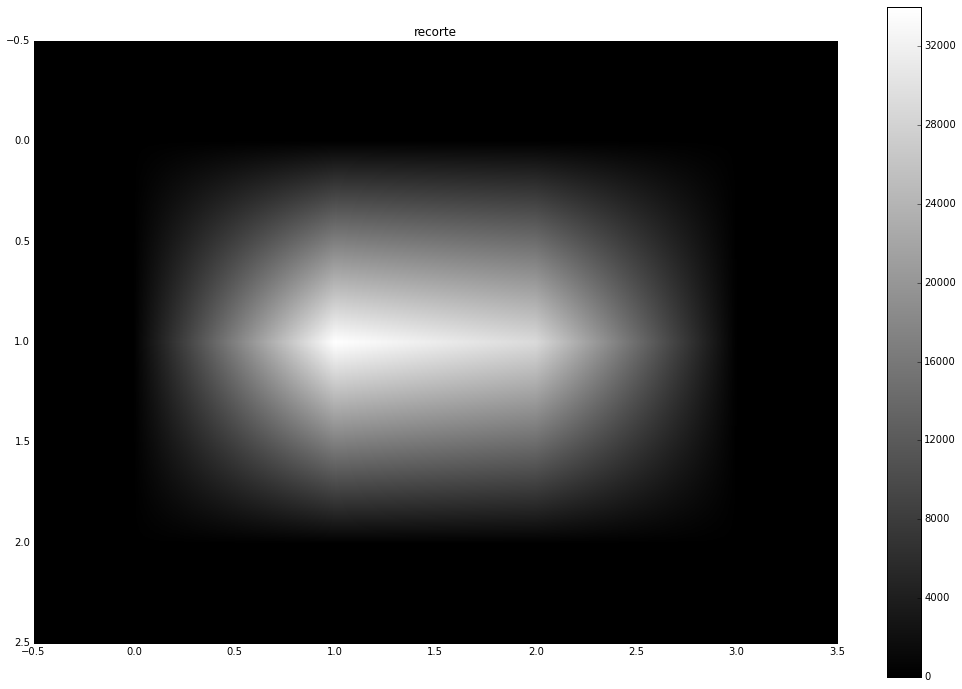

In [56]:
fig = figure(figsize=(18,12))
imshow(recorte, cmap='gray')
colorbar()
title('recorte')
savefig(path_modelado+'recorte.png', bbox_inches='tight')
show()
close()

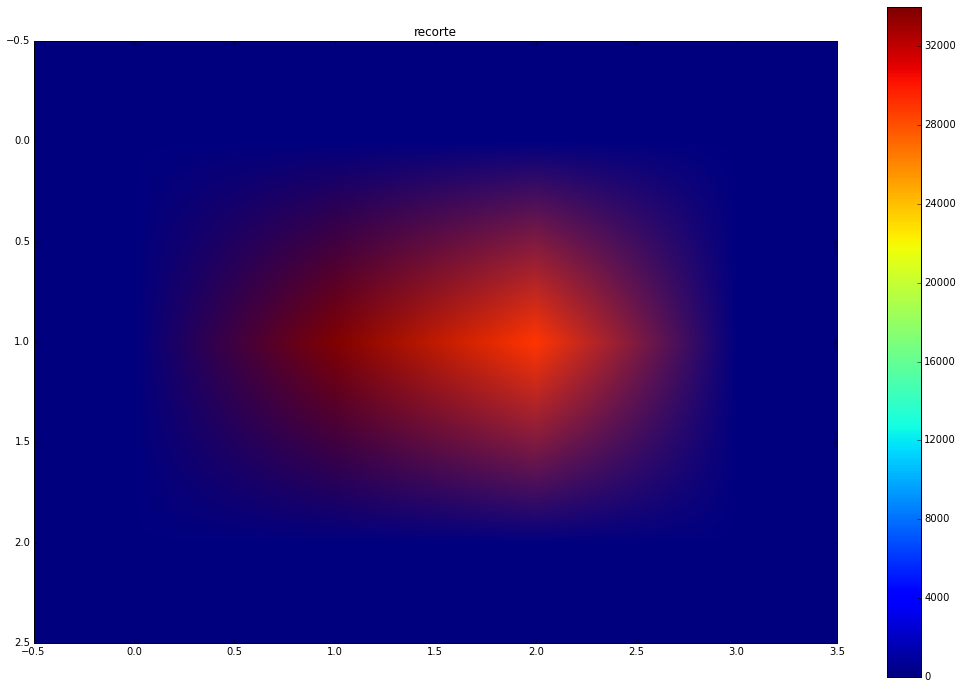

In [57]:
fig = figure(figsize=(18,12))
imshow(recorte)
colorbar()
title('recorte')
savefig(path_modelado+'recorte.png', bbox_inches='tight')
show()
close()

In [37]:
#Fuente: https://gist.github.com/andrewgiessel/6122739

#La rotacion entra en radianes
def gaussiana(x_0, y_0, sigma_x, sigma_y, amplitud, rotacion):

    x_0 = x_0*cos(rotacion) - y_0*sin(rotacion)
    y_0 = x_0*sin(rotacion) + y_0*cos(rotacion)
    
    def rotgauss(x,y):
        xp = x*cos(rotacion) - y*sin(rotacion)
        yp = x*sin(rotacion) + y*cos(rotacion)
        g = amplitud*exp( -( ((xp-x_0)/sigma_x)**2 + ((yp-y_0)/sigma_y)**2 )/2. )
        
        return g
    
    return rotgauss

#Retorna x_0, y_0, sigma_x, sigma_y, amplitud, rotacion
def momentos(matriz):
    total = matriz.sum()
    X, Y = indices(matriz.shape)
    x_0 = (X*matriz).sum()/total
    y_0 = (Y*matriz).sum()/total
    col = matriz[:, int(y_0)]
    sigma_x = np.sqrt(abs((np.arange(col.size)-y_0)**2*col).sum()/col.sum())
    row = matriz[int(x_0), :]
    sigma_y = np.sqrt(abs((np.arange(row.size)-x_0)**2*row).sum()/row.sum())
    amplitud = matriz.max()
    return x_0, y_0, sigma_x, sigma_y, amplitud, 0.0

#Retorna x_0, y_0, sigma_x, sigma_y, amplitud, rotacion despues del fit
def fit_gaussiana(matriz):
    parametros = momentos(matriz)
    errorfunction = lambda p: ravel(gaussiana(*p)(*indices(matriz.shape)) - matriz)
    p, exito = leastsq(errorfunction, parametros)
    return p

In [46]:
recorte_x_0, recorte_y_0, recorte_sigma_x, recorte_sigma_y, recorte_amplitud, recorte_rotacion = fit_gaussiana(recorte)
print recorte_x_0, recorte_y_0, recorte_sigma_x, recorte_sigma_y, recorte_amplitud, recorte_rotacion

0.994978798972 1.48999552074 0.159156134282 0.252939026966 221884.397629 -0.00682829955774


In [47]:
recorte_rotgauss = gaussiana(recorte_x_0, recorte_y_0, recorte_sigma_x, recorte_sigma_y, recorte_amplitud, recorte_rotacion)

In [48]:
recorte_fit = recorte_rotgauss(*indices(recorte.shape))

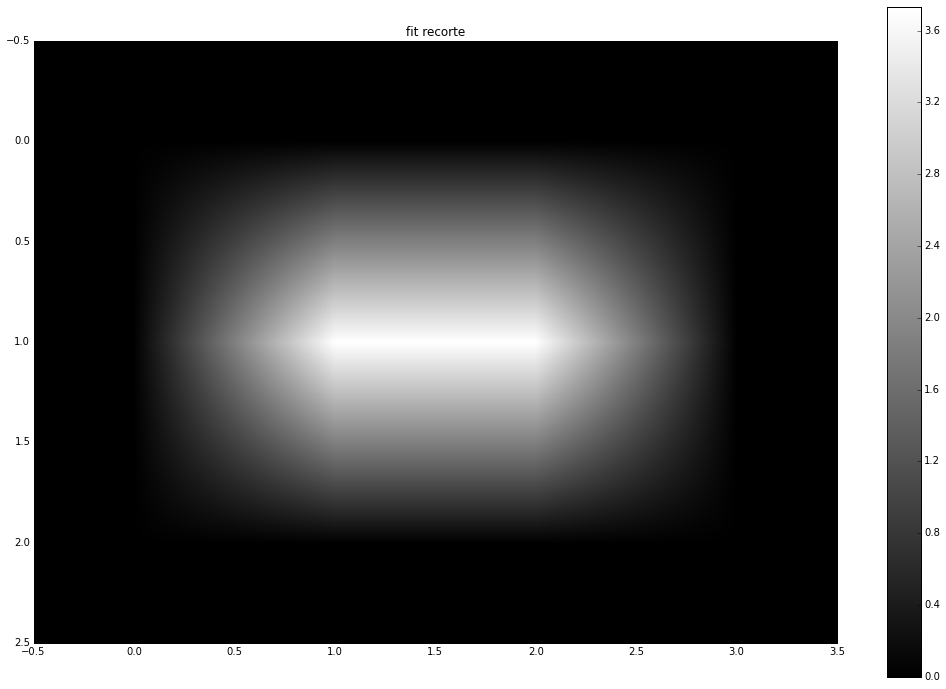

In [49]:
fig = figure(figsize=(18,12))
imshow(recorte_fit, cmap='gray',vmin=0,vmax=3.73)
colorbar()
title('fit recorte')
savefig(path_modelado+'recorte_fit.png', bbox_inches='tight')
show()
close()

In [50]:
print amax(recorte)
print amax(recorte_fit)

33990.1005859
33990.1005691


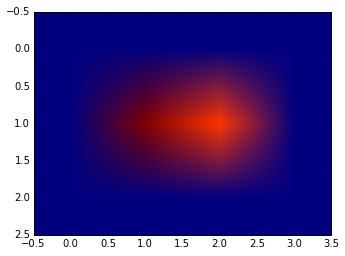

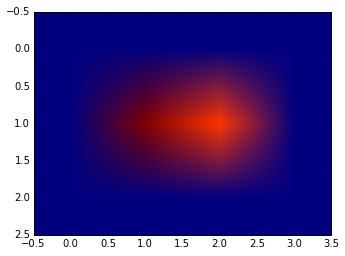

In [51]:
imshow(recorte)
show()
close()

imshow(recorte_fit)
show()
close()